<h3>Step 1: Import libraries</h3>

In [998]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import math
import warnings
warnings.filterwarnings('ignore')

<h3>Step 2: Import data</h3>

In [999]:
# Read dataset
train_data_path = os.path.abspath('datasets/train_data.csv')
test_data_path = os.path.abspath('datasets/testing_data.csv')

# merging two csv files 
dataframe = pd.concat(map(pd.read_csv, [train_data_path, test_data_path]), ignore_index=True)

dataframe.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe


<h3>Step 3: Data Analysis / Preprocessing</h3>

EDA typically involves several key steps, including:

- Data cleaning and preparation involve removing missing or incorrect values, transforming variables, and handling outliers.
- Data visualization is the process of creating graphs, charts, and other visual representations of the data to help identify patterns, relationships, and anomalies.
- Statistical analysis involves applying mathematical and statistical methods to the data to identify important features and relationships.

<b>Get required data</b>

We don’t need the Filename column so we can drop it.

In [1000]:
# Get required data
dataframe.drop(columns = ['Filename'], inplace=True)
dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,"Biratnagar, Nepal",2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe


<b>Describe data</b>

Get statistical description of data using Pandas describe() function. It shows us the count, mean, standard deviation, and range of data.

In [1001]:
# Describe data
dataframe.describe()

,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2
count,10281.000000,10281.000000,10281.000000,10281.000000,10281.000000,10281.000000,10031.000000,9807.000000,9034.000000,9920.000000
mean,2022.948254,2.683980,12.116526,167.517848,142.942723,145.403790,39.393336,101.412380,13.305071,37.899775
std,0.221524,1.764717,8.277427,102.798851,130.398412,103.952927,33.371867,116.346153,9.876013,39.627358
min,2022.000000,2.000000,1.000000,15.000000,4.000000,7.000000,1.000000,0.000000,2.000000,0.670000
25%,2023.000000,2.000000,3.000000,97.000000,35.000000,64.000000,12.000000,4.000000,4.400000,7.000000
50%,2023.000000,2.000000,13.000000,152.000000,70.080000,113.000000,31.000000,52.000000,10.000000,20.000000
75%,2023.000000,3.000000,20.000000,230.000000,257.000000,198.000000,59.660000,174.000000,20.000000,64.000000
max,2023.000000,10.000000,28.000000,450.000000,500.000000,480.000000,225.000000,410.000000,57.000000,169.000000


<b>Distribution of data</b>

Check data distribution.

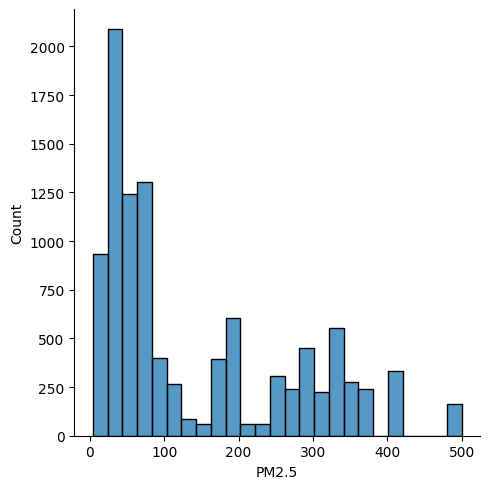

In [1002]:
# PM2.5 distribution
sns.displot(dataframe['PM2.5'])

<b>Label encoding</b>

Label encoding is a preprocessing technique in machine learning and data analysis where categorical data is converted into numerical values, to make it compatible with mathematical operations and models.

In [1003]:
# Label encoding
le = LabelEncoder()
dataframe['Location'] = le.fit_transform(dataframe['Location'])
dataframe['Hour'] = le.fit_transform(dataframe['Hour'])
#dataframe['AQI_Class'] = le.fit_transform(dataframe['AQI_Class'])

dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,7,2023,3,2,18,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,0,2023,2,24,18,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,1,2023,2,3,10,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,5,2023,3,10,12,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,3,2023,2,7,8,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe


<b>Correlation matrix</b>

A correlation matrix is a table that summarizes the relationship between multiple variables in a dataset. It shows the correlation coefficients between each pair of variables, which indicate the strength and direction of the relationship between the variables. It is useful for identifying highly correlated variables and selecting a subset of variables for further analysis.

The correlation coefficient can range from -1 to 1, where:

- A correlation coefficient of -1 indicates a strong negative relationship between two variables
- A correlation coefficient of 0 indicates no relationship between two variables
- A correlation coefficient of 1 indicates a strong positive relationship between two variables

In [1004]:
# Correlation matrix
#dataframe.corr()
#sns.heatmap(dataframe.corr())

<b>Drop insignificant data</b>

From the correlation matrix, we see that Year and Month is not correlated to other attributes so we can drop that too.

In [1005]:
# Drop Year and Month columns
dataframe.drop(columns=['Year'], inplace=True)
dataframe.drop(columns=['Month'], inplace=True)

In [1006]:
# Review missing data
print(dataframe.isnull().sum())

Location        0
Day             0
Hour            0
AQI             0
PM2.5           0
PM10            0
O3            250
CO            474
SO2          1247
NO2           361
AQI_Class       0
dtype: int64


In [1007]:
# Eliminate rows with at least three missing values
dataframe = dataframe.dropna(thresh=3)
dataframe.head()

,Location,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,7,2,18,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,0,24,18,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,1,3,10,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,5,10,12,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,3,7,8,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe


In [1008]:
# Review rows with remaining missing values
missing_O3_indices = [i for i,v in enumerate(dataframe['O3'].isnull()) if v==True]
missing_CO_indices = [i for i,v in enumerate(dataframe['CO'].isnull()) if v==True]
missing_SO2_indices = [i for i,v in enumerate(dataframe['SO2'].isnull()) if v==True]
missing_NO2_indices = [i for i,v in enumerate(dataframe['NO2'].isnull()) if v==True]
all_missing_indices = list(set(missing_O3_indices + missing_CO_indices + missing_SO2_indices + missing_NO2_indices))
print("Number of missing SO2 data is", len(all_missing_indices))
missingData = dataframe.iloc[all_missing_indices]

Number of missing SO2 data is 1369


In [1009]:
# Inpute missing values for SO2 based on the mean of similar rows
for index, row in missingData.iterrows():
    o3 = row[6]
    co = row[7]
    so2 = row[8]
    no2 = row[9]
    if math.isnan(row[6]): dataframe.at[index, 'O3'] = dataframe.loc[:, 'O3'].mean()
    if math.isnan(row[7]): dataframe.at[index, 'CO'] = dataframe.loc[:, 'CO'].mean()
    if math.isnan(row[8]): dataframe.at[index, 'SO2'] = dataframe.loc[:, 'SO2'].mean()
    if math.isnan(row[9]): dataframe.at[index, 'NO2'] = dataframe.loc[:, 'NO2'].mean()

# Review missing data
print(dataframe.isnull().sum())

Location     0
Day          0
Hour         0
AQI          0
PM2.5        0
PM10         0
O3           0
CO           0
SO2          0
NO2          0
AQI_Class    0
dtype: int64


<h3>Step 4: Split data</h3>

Splitting data into independent and dependent variables involves separating the input features (independent variables) from the target variable (dependent variable). The independent variables are used to predict the value of the dependent variable.

The data is then split into a training set and a test set, with the training set used to fit the model and the test set used to evaluate its performance.

<b>Independent / Dependent variables</b>

In [1010]:
# Split data into dependent/independent variables
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In [1011]:
# encoding categorical data e.g. gender as a dummy variable
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# encoding categorical data e.g. disease outcome as a dummy variable
y,class_names = pd.factorize(y)

print(class_names)

['c_Unhealthy_for_Sensitive_Groups' 'b_Moderate' 'f_Severe' 'a_Good'
 'd_Unhealthy' 'e_Very_Unhealthy']


<b>Train / Test split</b>

The data is usually divided into two parts, with the majority of the data used for training the model and a smaller portion used for testing. We have split the data into 75% for training and 25% for testing.

In [1012]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

<h3>Step 5: Feature scaling</h3>

Feature scaling is a method of transforming the values of numeric variables so that they have a common scale as machine learning algorithms are sensitive to the scale of the input features.

There are two common methods of feature scaling: normalization and standardization.

- Normalization scales the values of the variables so that they fall between 0 and 1. This is done by subtracting the minimum value of the feature and dividing it by the range (max-min).
- Standardization transforms the values of the variables so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing it by the standard deviation.

Feature scaling is usually performed before training a model, as it can improve the performance of the model and reduce the time required to train it, and helps to ensure that the algorithm is not biased towards variables with larger values.

In [1013]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Step 6: Train model</h3>

Training a machine learning model involves using a training dataset to estimate the parameters of the model. The training process uses a learning algorithm that iteratively updates the model parameters, minimizes a loss function, which measures the difference between the predicted values and the actual values in the training data, and updates the model parameters to improve the accuracy of the model.

Passed the X_train and y_train data into the Decision Tree classifier model by classifier.fit to train the model with our training data.

In [1014]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

<h3>Step 7: Predict result / Score model</h3>

Once the model is trained, it can be used to make predictions on new data. The prediction is made by starting at the root node of the tree and navigating it based on the values of the attributes of the input sample. The prediction is given by the class label at the leaf node reached.

The accuracy of the model can be evaluated on a test set, which was previously held out from the training process.

In [1030]:
# Model performance on training set
y_pred_train = classifier.predict(X_train)

print(X_train)

print(y_pred_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 4. ... 4. 1. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<h3>Step 8: Evaluate model</h3>

Accuracy is a useful metric for assessing the performance of a model, but it can be misleading in some cases. For example, in a highly imbalanced dataset, a model that always predicts the majority class will have high accuracy, even though it may not be performing well. Therefore, it is important to consider other metrics, such as confusion matrix, precision, recall, F1-score, and ROC-AUC, along with accuracy, to get a more complete picture of the performance of a model.

<b>Accuracy</b>

Accuracy is a commonly used metric for evaluating the performance of a machine learning model. It measures the proportion of correct predictions made by the model on a given dataset.

In a binary classification problem, accuracy is defined as the number of correct predictions divided by the total number of predictions. In a multi-class classification problem, accuracy is the average of the individual class accuracy scores.

In [1029]:
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_train)

print(y_test)

print(y_pred_train)

print("Accuracy: {:.2f}".format(accuracy))

ValueError: Found input variables with inconsistent numbers of samples: [2571, 7710]

<b>Classification report</b>

A classification report is a summary of the performance of a classification model. It provides several metrics for evaluating the performance of the model on a classification task, including precision, recall, f1-score, and support.

The classification report also provides a weighted average of the individual class scores, which takes into account the imbalance in the distribution of classes in the dataset.

In [1017]:
# Classification report
print(y_train)
print(y_pred_train)

print(classification_report(y_train, y_pred_train, target_names=class_names))

[1 1 4 ... 4 1 5]
[1 1 4 ... 4 1 5]
                                  precision    recall  f1-score   support

c_Unhealthy_for_Sensitive_Groups       1.00      1.00      1.00      1800
                      b_Moderate       1.00      1.00      1.00       990
                        f_Severe       1.00      1.00      1.00       912
                          a_Good       1.00      1.00      1.00       972
                     d_Unhealthy       1.00      1.00      1.00      1653
                e_Very_Unhealthy       1.00      1.00      1.00      1383

                        accuracy                           1.00      7710
                       macro avg       1.00      1.00      1.00      7710
                    weighted avg       1.00      1.00      1.00      7710



<b>F1 score</b>

F1-score is the harmonic mean of precision and recall. It provides a single score that balances precision and recall. Support is the number of instances of each class in the evaluation dataset.

In [1018]:
# F1 score
print("F1 Score: ", f1_score(y_train, y_pred_train, average='micro'))

F1 Score:  1.0


<b>Confusion matrix</b>

A confusion matrix is used to evaluate the performance of a classification model. It summarizes the model’s performance by comparing the actual class labels of the data to the predicted class labels generated by the model.

True Positives (TP): Correctly predicted positive instances.
False Positives (FP): Incorrectly predicted positive instances.
True Negatives (TN): Correctly predicted negative instances.
False Negatives (FN): Incorrectly predicted negative instances.

It provides a clear and detailed understanding of how well the model is performing and helps to identify areas of improvement.

<Axes: >

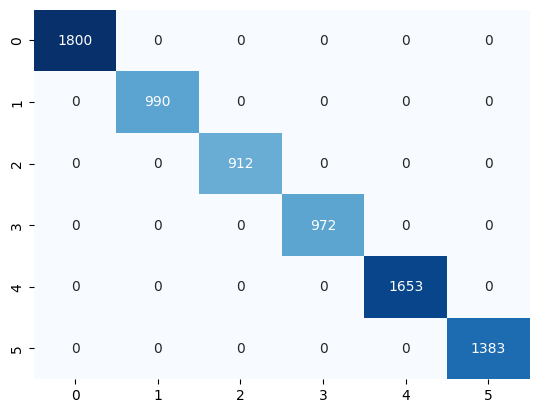

In [1019]:
# Confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

<b>Precision-Recall curve</b>

A precision-recall curve is a plot that summarizes the performance of a binary classification model as a trade-off between precision and recall and is useful for evaluating the model’s ability to make accurate positive predictions while finding as many positive instances as possible. Precision and Recall are two common metrics for evaluating the performance of a classification model.

Precision is the number of true positive predictions divided by the sum of true positive and false positive predictions. It measures the accuracy of the positive predictions made by the model.

Recall is the number of true positive predictions divided by the sum of true positive and false negative predictions. It measures the ability of the model to find all positive instances.

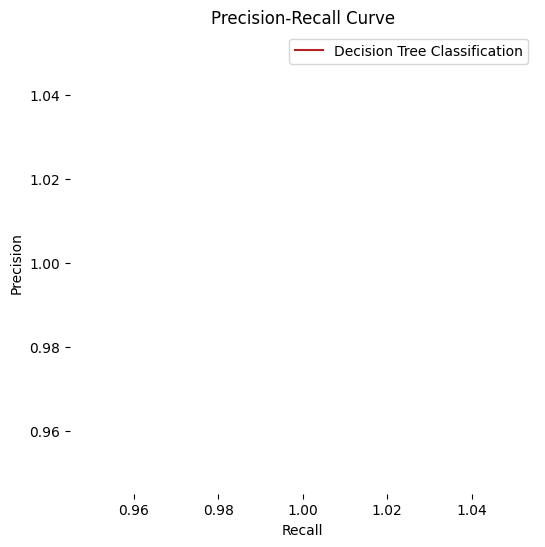

In [1020]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
recall = recall_score(y_train, y_pred_train, pos_label='positive', average='micro')
precision = precision_score(y_train, y_pred_train, pos_label='positive', average='micro')

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend()

<b>AUC/ROC curve</b>

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are commonly used metrics for evaluating the performance of a binary classification model.

A ROC curve plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different thresholds of the model’s prediction probabilities. The TPR is the number of true positive predictions divided by the number of actual positive instances, while the FPR is the number of false positive predictions divided by the number of actual negative instances.

The AUC is the area under the ROC curve and provides a single-number metric that summarizes the performance of the model over the entire range of possible thresholds.

A high AUC indicates that the model is able to distinguish positive instances from negative instances well.

[0.         0.07259528 0.09618875 0.09800363 0.09800363 0.14519056
 0.14700544 0.26678766 0.34664247 0.42105263 0.4646098  0.50272232
 0.50272232 0.50272232 0.50272232 0.5154265  0.5154265  0.54990926
 0.59528131 0.59528131 0.67332123 0.67332123 0.68058076 0.71143376
 0.73684211 0.73684211 0.73684211 0.73684211 0.7676951  0.7676951
 0.7676951  0.7676951  0.7676951  0.7676951  0.80943739 0.81669691
 0.81669691 0.82758621 0.84573503 0.84573503 0.84573503 0.84573503
 0.84573503 0.88566243 0.88566243 0.88566243 0.88566243 0.90562613
 0.90562613 0.92377495 0.92558984 0.92558984 0.92558984 0.92558984
 0.92558984 0.92558984 0.92740472 0.97822142 0.97822142 0.97822142
 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142
 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142
 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142 0.97822142
 0.97822142 0.97822142 0.97822142 0.9800363  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

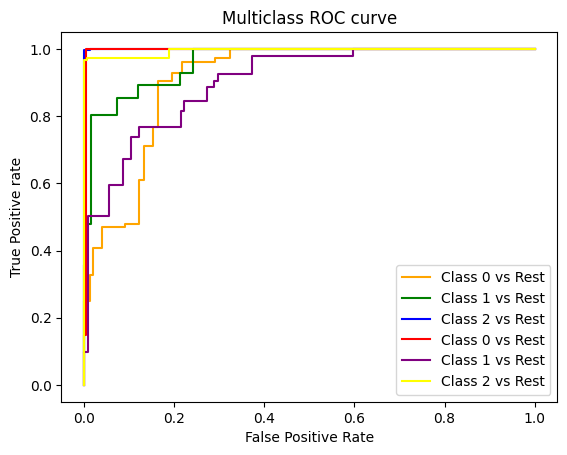

In [1021]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# Plot AUC/ROC curve
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
#c_Unhealthy_for_Sensitive_Groups' 'b_Moderate' 'f_Severe' 'a_Good'
#'d_Unhealthy' 'e_Very_Unhealthy

print(tpr[4])

plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='-',color='red', label='Class 0 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='purple', label='Class 1 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='yellow', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


[1 1 4 ... 4 1 5]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

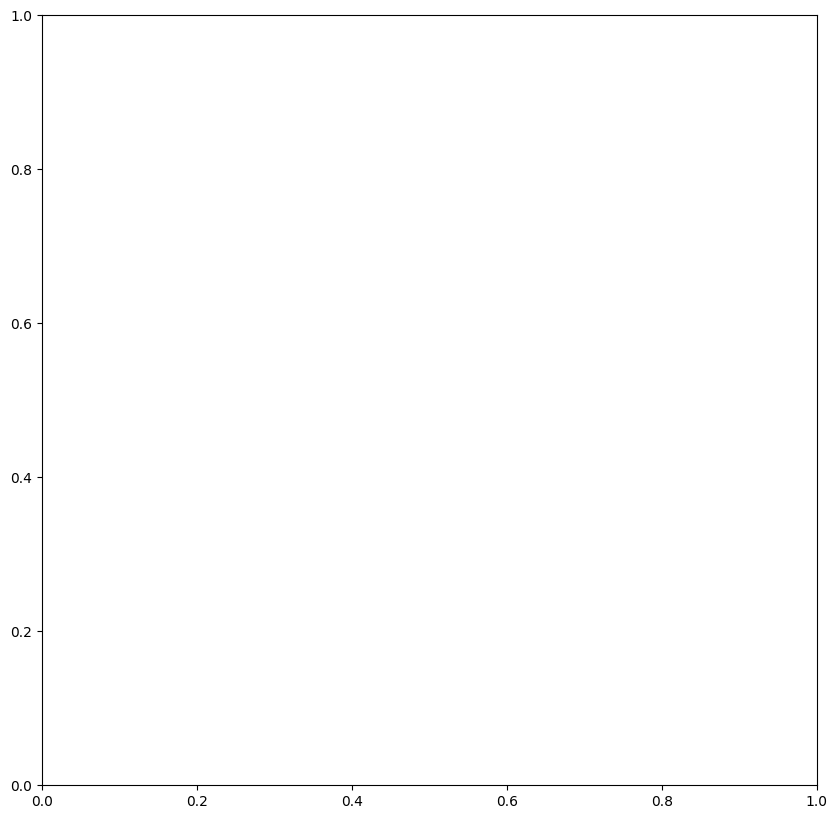

In [1025]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

print(y_train)

fig, ax = plt.subplots(figsize=(10, 10))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "yellow", "purple"])
for class_id, color in zip(range(6), colors):
    RocCurveDisplay.from_predictions(
        y_train[:, class_id],
        y_pred_train[:, class_id],
        name=f"ROC curve for {class_names[class_id]}",
        color=color,
        ax=ax,
    )

In [967]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 1.00
Confusion Matrix: 
 [[601   0   0   0   0   0]
 [  0 330   0   0   0   0]
 [  0   0 304   0   0   0]
 [  0   0   0 324   0   0]
 [  0   0   0   0 551   0]
 [  0   0   0   0   0 461]]
                                  precision    recall  f1-score   support

c_Unhealthy_for_Sensitive_Groups       1.00      1.00      1.00       601
                      b_Moderate       1.00      1.00      1.00       330
                        f_Severe       1.00      1.00      1.00       304
                          a_Good       1.00      1.00      1.00       324
                     d_Unhealthy       1.00      1.00      1.00       551
                e_Very_Unhealthy       1.00      1.00      1.00       461

                        accuracy                           1.00      2571
                       macro avg       1.00      1.00      1.00      2571
                    weighted avg       1.00      1.00      1.00      2571

